In [1]:
!pip install kagglehub

In [3]:
import kagglehub
kagglehub.login()

In [4]:

# Download latest version
path = kagglehub.model_download("google/gemma-2/pyTorch/gemma-2-9b-it")

print("Path to model files:", path)

Download already complete (30704 bytes).
Download already complete (4241003 bytes).
Resuming download from 6676086784 bytes (3984433686 bytes left)...
Resuming download from https://www.kaggle.com/api/v1/models/google/gemma-2/pyTorch/gemma-2-9b-it/1/download/pytorch_model-00000-of-00002.bin (6676086784/10660520470) bytes left.



 63%|██████▎   | 6.22G/9.93G [00:00<?, ?B/s]
 63%|██████▎   | 6.22G/9.93G [00:00<02:00, 33.1MB/s]
 63%|██████▎   | 6.23G/9.93G [00:00<01:57, 33.9MB/s]
 63%|██████▎   | 6.23G/9.93G [00:00<02:05, 31.8MB/s]

Resuming download from 7084302336 bytes (755490424 bytes left)...



 63%|██████▎   | 6.24G/9.93G [00:00<01:58, 33.3MB/s]
 63%|██████▎   | 6.24G/9.93G [00:00<01:45, 37.7MB/s]

Resuming download from https://www.kaggle.com/api/v1/models/google/gemma-2/pyTorch/gemma-2-9b-it/1/download/pytorch_model-00001-of-00002.bin (7084302336/7839792760) bytes left.




 90%|█████████ | 6.60G/7.30G [00:00<?, ?B/s]
 63%|██████▎   | 6.25G/9.93G [00:00<01:25, 46.2MB/s]

 90%|█████████ | 6.60G/7.30G [00:00<00:33, 22.4MB/s]
 63%|██████▎   | 6.26G/9.93G [00:01<01:16, 51.8MB/s]
 63%|██████▎   | 6.27G/9.93G [00:01<01:05, 59.6MB/s]

 91%|█████████ | 6.61G/7.30G [00:00<00:24, 30.6MB/s]
 63%|██████▎   | 6.28G/9.93G [00:01<00:47, 82.0MB/s]

 91%|█████████ | 6.62G/7.30G [00:00<00:17, 42.0MB/s]
 63%|██████▎   | 6.29G/9.93G [00:01<00:49, 78.7MB/s]

 91%|█████████ | 6.63G/7.30G [00:00<00:14, 50.9MB/s]
 63%|██████▎   | 6.30G/9.93G [00:01<00:55, 70.4MB/s]

 91%|█████████ | 6.64G/7.30G [00:00<00:09, 73.4MB/s]
 64%|██████▎   | 6.31G/9.93G [00:01<00:49, 78.2MB/s]

 91%|█████████ | 6.65G/7.30G [00:00<00:09, 74.0MB/s]
 64%|██████▎   | 6.32G/9.93G [00:01<00:48, 79.4MB/s]

 91%|█████████ | 6.66G/7.30G [00:01<00:09, 75.9MB/s]
 64%|██████▎   | 6.33G/9.93G [00:01<00:40, 94.5MB/s]

 91%|█████████▏| 6.66G/7.30G [00:01<00:08, 77.9MB/s]
 64%|██████▍   | 6.34G/9.93G [00:02<00:55, 6

Path to model files: /home/ec2-user/.cache/kagglehub/models/google/gemma-2/pyTorch/gemma-2-9b-it/1


In [ ]:
#Path to model files: /home/ec2-user/.cache/kagglehub/models/google/gemma-2/pyTorch/gemma-2-9b-it/1

In [5]:
!pwd

/home/ec2-user/SageMaker/gemma-experiments


In [6]:
!pip install -q -U immutabledict sentencepiece 
!git clone https://github.com/google/gemma_pytorch.git
!mkdir /kaggle/working/gemma/
!mv /kaggle/working/gemma_pytorch/gemma/* /kaggle/working/gemma/

Cloning into 'gemma_pytorch'...
remote: Enumerating objects: 244, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 244 (delta 100), reused 63 (delta 63), pack-reused 110 (from 1)
Receiving objects: 100% (244/244), 2.17 MiB | 31.33 MiB/s, done.
Resolving deltas: 100% (142/142), done.
mkdir: cannot create directory ‘/kaggle/working/gemma/’: No such file or directory
mv: cannot stat ‘/kaggle/working/gemma_pytorch/gemma/*’: No such file or directory


In [7]:
import sys 
sys.path.append("gemma_pytorch/") 
from gemma.config import GemmaConfig, get_model_config
from gemma.model import GemmaForCausalLM
from gemma.tokenizer import Tokenizer
import contextlib
import os
import torch

In [8]:
VARIANT = "9b" 
MACHINE_TYPE = "cuda" 
weights_dir = '/home/ec2-user/.cache/kagglehub/models/google/gemma-2/pyTorch/gemma-2-9b-it/1' 


In [9]:
@contextlib.contextmanager
def _set_default_tensor_type(dtype: torch.dtype):
    """Sets the default torch dtype to the given dtype."""
    torch.set_default_dtype(dtype)
    yield
    torch.set_default_dtype(torch.float)

model_config = get_model_config(VARIANT)
model_config.tokenizer = os.path.join(weights_dir, "tokenizer.model")

device = torch.device(MACHINE_TYPE)
with _set_default_tensor_type(model_config.get_dtype()):
    model = GemmaForCausalLM(model_config)
    model.load_weights(weights_dir)
    model = model.to(device).eval()

In [10]:
USER_CHAT_TEMPLATE = "<start_of_turn>user\n{prompt}<end_of_turn><eos>\n"
MODEL_CHAT_TEMPLATE = "<start_of_turn>model\n{prompt}<end_of_turn><eos>\n"

prompt = (
    USER_CHAT_TEMPLATE.format(
        prompt="What is a good place for travel in the US?"
    )
    + MODEL_CHAT_TEMPLATE.format(prompt="California.")
    + USER_CHAT_TEMPLATE.format(prompt="What can I do in California?")
    + "<start_of_turn>model\n"
)

model.generate(
    USER_CHAT_TEMPLATE.format(prompt=prompt),
    device=device,
    output_len=100,
)

"California is brimming with amazing things to do!  To give you some ideas, tell me:\n\n* **What are you interested in?** Beaches, mountains, cities, theme parks, wine country, history, nature, art, food?\n* **Who are you traveling with?**  Solo, family, friends, partner?\n* **What's your budget like?** \n* **How long do you have?**  A weekend, a week, longer? "

In [19]:
import json
from tqdm import tqdm

DATASET_PATH = "synthetic_data_generation/synthetic_data.json"  # Path to your dataset
with open(DATASET_PATH, "r") as f:
    dataset = json.load(f)

def build_prompt(query: str) -> str:
    """
    Constructs a structured prompt for financial FAQ use case.
    """
    return (
        """You are a financial assistant trained to answer user queries related to their financial transactions, 
        mobile payments, and services for a financial app called Bkash in Bangladesh. 
        Assume that you have access to the user's transaction history, purchased subscription and data plans through the Bkash app.
        You are allowed to provide a dummy value for the amounts and numbers that the user asks in a query. 
        Your answers should be contextually accurate and concise. Don't worry too much about the exact numerical results in your answer.\n"""
        + USER_CHAT_TEMPLATE.format(prompt=query)
        + "<start_of_turn>model\n"
    )

# Evaluation function
def evaluate_dataset(dataset):
    results = []

    for entry in tqdm(dataset):
        query = entry["query"]
        expected_answer = entry["expected_answer"]

        # Build a financial FAQ-specific prompt
        prompt = build_prompt(query)

        # Generate model response
        generated_output = model.generate(
            prompt,
            device=device,
            output_len=100  # Adjust output length as needed
        )

        # Extract and clean up the generated response
        generated_response = generated_output.strip()

        # Store result
        result = {
            "query": query,
            "expected_answer": expected_answer,
            "generated_response": generated_response
        }
        results.append(result)

    return results

In [20]:
evaluation_results = evaluate_dataset(dataset)

100%|██████████| 60/60 [06:13<00:00,  6.22s/it]


In [21]:
OUTPUT_PATH = "benchmarking_tests/evaluation_results_with_data_access_prompt_2.json"
with open(OUTPUT_PATH, "w") as f:
    json.dump(evaluation_results, f, indent=4)

print(f"Evaluation results saved to {OUTPUT_PATH}")

Evaluation results saved to benchmarking_tests/evaluation_results_with_data_access_prompt_2.json


In [4]:
!pip install rouge nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.7/781.7 kB 36.8 MB/s eta 0:00:00


In [5]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge import Rouge

def calculate_scores(results):
    """
    Calculate BLEU and ROUGE scores for generated responses.

    Args:
        results (list): List of dictionaries, each containing:
                        - 'query': The user query
                        - 'expected_answer': The ground truth response
                        - 'generated_response': The model's generated response

    Returns:
        list: A list of dictionaries with BLEU and ROUGE scores for each query.
    """
    rouge = Rouge()
    smoothing_function = SmoothingFunction().method1  # Smoothing for BLEU
    scores = []
    for result in results:
        expected = result["expected_answer"]
        generated = result["generated_response"]

        # Calculate BLEU Score
        bleu_score = sentence_bleu(
            [expected.split()], 
            generated.split(), 
            smoothing_function=smoothing_function
        )

        # Calculate ROUGE Scores
        rouge_scores = rouge.get_scores(generated, expected, avg=True)

        # Store scores
        result_with_scores = {
            "query": result["query"],
            "expected_answer": expected,
            "generated_response": generated,
            "bleu_score": bleu_score,
            "rouge_1": rouge_scores["rouge-1"]["f"],
            "rouge_2": rouge_scores["rouge-2"]["f"],
            "rouge_l": rouge_scores["rouge-l"]["f"]
        }
        scores.append(result_with_scores)

    return scores


In [7]:
# Load evaluation results (after inference)
import json
with open("benchmarking_tests/evaluation_results_with_data_access_prompt_2.json", "r") as f:
    evaluation_results = json.load(f)

# Calculate scores
scores = calculate_scores(evaluation_results)

# Save scores to a JSON file
SCORES_OUTPUT_PATH = "benchmarking_tests/evaluation_scores.json"
with open(SCORES_OUTPUT_PATH, "w") as f:
    json.dump(scores, f, indent=4)

print(f"Scores saved to {SCORES_OUTPUT_PATH}")

Scores saved to benchmarking_tests/evaluation_scores.json


In [8]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_scores(scores):
    """
    Visualize the overall BLEU and ROUGE scores.

    Args:
        scores (list): List of dictionaries with BLEU and ROUGE scores for each query.
                       Each dictionary should contain keys:
                       - 'bleu_score'
                       - 'rouge_1'
                       - 'rouge_2'
                       - 'rouge_l'
    """
    # Extract scores
    bleu_scores = [entry["bleu_score"] for entry in scores]
    rouge_1_scores = [entry["rouge_1"] for entry in scores]
    rouge_2_scores = [entry["rouge_2"] for entry in scores]
    rouge_l_scores = [entry["rouge_l"] for entry in scores]

    # Calculate averages
    avg_bleu = np.mean(bleu_scores)
    avg_rouge_1 = np.mean(rouge_1_scores)
    avg_rouge_2 = np.mean(rouge_2_scores)
    avg_rouge_l = np.mean(rouge_l_scores)

    # Labels and values for the bar chart
    metrics = ["BLEU", "ROUGE-1", "ROUGE-2", "ROUGE-L"]
    averages = [avg_bleu, avg_rouge_1, avg_rouge_2, avg_rouge_l]

    # Plotting the bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(metrics, averages, color=["blue", "orange", "green", "red"], alpha=0.8)
    # Add value annotations
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{height:.2f}",
            ha="center",
            va="bottom",
            fontsize=12
        )

    # Title and labels
    plt.title("Overall Model Performance", fontsize=16)
    plt.ylabel("Average Score", fontsize=14)
    plt.ylim(0, 1)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()

    # Show the plot
    plt.show()

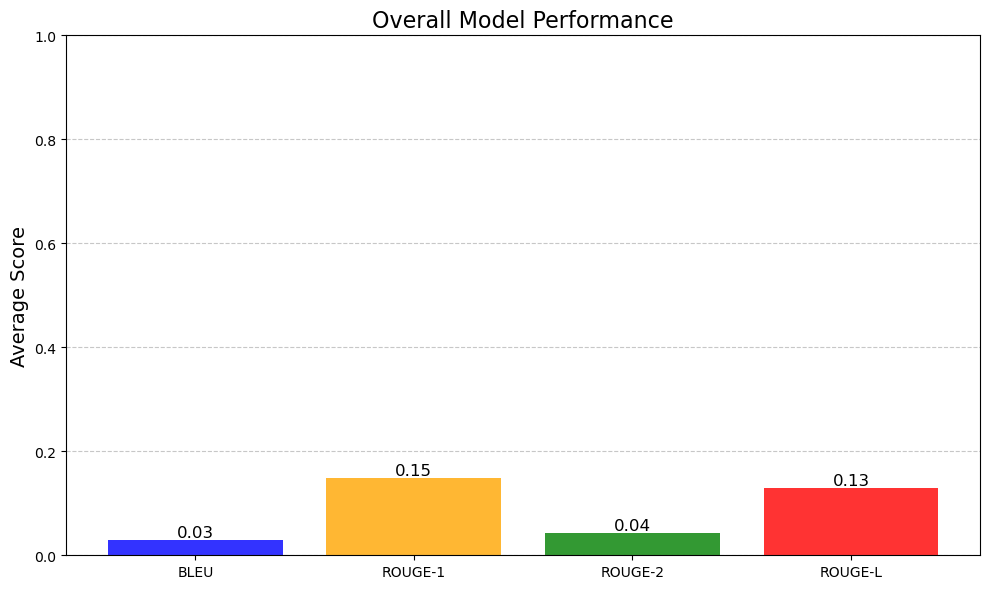

In [9]:
visualize_scores(scores)